<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 4 / SPRINT 2 / NOTE 1*

# 📝 Assignment

---


# Count-based_Representation

indeed.com 에서 Data Scientist 키워드로 Job descrition을 찾아 스크래핑한 데이터를 이용해 과제를 진행해 보겠습니다.

[Data_Scienties.csv](https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/indeed/Data_Scientist.csv) 파일에는 1300여개의 Data Scientist job description 정보가 담겨 있습니다.

## 1. 데이터 전처리 (Text preprocessing)

In [131]:
import re
import string

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 0) 텍스트 분석에 앞서 데이터 전처리를 진행합니다.

- 파일을 불러온 후 title, company, description 에 해당하는 Column만 남겨주세요.
- 중복값을 제거하세요.

In [132]:
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/indeed/Data_Scientist.csv')

In [133]:
df = df[['title', 'company', 'description']]

In [134]:
df['title'] = df['title'].str.replace('\n', ' ')
df['title'] = df['title'].str.replace('& ', '')
df['company'] = df['company'].str.replace('\n', ' ')
df['company'] = df['company'].str.replace('& ', '')
df['description'] = df['description'].str.replace('\n', ' ')
df['description'] = df['description'].str.replace('& ', '')

In [135]:
df = df.drop_duplicates(keep='last')

### 1) 토큰을 정제합니다.

- 문자를 소문자로 통일
- 분석에 관련 없는 정보 제거
- 이번 과제는 `spacy` 로부터 `"en_core_web_sm"` 을 로드하여 진행해주세요.

- **문항 1) 대문자를 소문자로 변경하는 함수를 입력하세요.**
- **문항 2) 정규 표현식을 사용하여 re 라이브러리에서 알파벳 소문자, 숫자만 받을 수 있는 코드를 작성하세요.**

In [136]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_sm")
tokenizer = Tokenizer(nlp.vocab)

In [137]:
features = df.columns
features

Index(['title', 'company', 'description'], dtype='object')

In [138]:
tokens = []

for doc in tokenizer.pipe(df['title']):
    doc_tokens = [re.sub(r"[^a-z0-9]", "", token.text.lower()) for token in doc]
    tokens.append(doc_tokens)

df['title_tokens'] = tokens
df['title_tokens'].head()

1              [data, scientist, structured, products]
3                          [specialist, data, science]
4                        [sr, data, scientist, remote]
5    [data, scientist, associate, sr, dads06, btb, ...
6                                    [data, scientist]
Name: title_tokens, dtype: object

In [139]:
tokens = []

for doc in tokenizer.pipe(df['company']):
    doc_tokens = [re.sub(r"[^a-z0-9]", "", token.text.lower()) for token in doc]
    tokens.append(doc_tokens)

df['company_tokens'] = tokens

In [140]:
tokens = []

for doc in tokenizer.pipe(df['description']):
    doc_tokens = [re.sub(r"[^a-z0-9]", "", token.text.lower()) for token in doc]
    tokens.append(doc_tokens)

df['description_tokens'] = tokens

In [141]:
df

,title,company,description,title_tokens,company_tokens,description_tokens
1,Data Scientist (Structured Products),EquiTrust Life Insurance Company,Job Details Description Essential Duties and R...,"[data, scientist, structured, products]","[equitrust, life, insurance, company]","[job, details, description, essential, duties,..."
3,"Specialist, Data Science",Nationwide,As a team member in the Finance and Internal A...,"[specialist, data, science]",[nationwide],"[as, a, team, member, in, the, finance, and, i..."
4,Sr. Data Scientist (Remote),American Credit Acceptance,Overview: American Credit Acceptance seeks a h...,"[sr, data, scientist, remote]","[american, credit, acceptance]","[overview, american, credit, acceptance, seeks..."
5,Data Scientist Associate Sr (DADS06) BTB - LEG...,"JPMorgan Chase Bank, N.A.",J.P. Morgan's Corporate Investment Bank (CIB) ...,"[data, scientist, associate, sr, dads06, btb, ...","[jpmorgan, chase, bank, na]","[jp, morgans, corporate, investment, bank, cib..."
6,Data Scientist,VyStar Credit Union,"At VyStar, we offer competitive pay, an excell...","[data, scientist]","[vystar, credit, union]","[at, vystar, we, offer, competitive, pay, an, ..."
...,...,...,...,...,...,...
1295,Senior Data Applied Scientist,Microsoft,Senior Data Applied Scientist Do you have a pa...,"[senior, data, applied, scientist]",[microsoft],"[senior, data, applied, scientist, do, you, ha..."
1296,Senior Data Scientist,Takeda Pharmaceuticals,Job Description OBJECTIVES: Effectively workin...,"[senior, data, scientist]","[takeda, pharmaceuticals]","[job, description, objectives, effectively, wo..."
1297,Senior Data Scientist,eBay Inc.,eBay is a global commerce leader that allows y...,"[senior, data, scientist]","[ebay, inc]","[ebay, is, a, global, commerce, leader, that, ..."
1298,Senior Data Scientist,Cox Automotive,"Cox Automotive, a subsidiary of Cox Enterprise...","[senior, data, scientist]","[cox, automotive]","[cox, automotive, a, subsidiary, of, cox, ente..."


In [142]:
df['token']  = df['title_tokens'] + df['company_tokens'] + df['description_tokens']

In [143]:
from collections import Counter

word_counts = Counter()
df['token'].apply(lambda x: word_counts.update(x))
word_counts.most_common(10)

[('and', 21886),
 ('to', 12697),
 ('the', 10557),
 ('of', 8865),
 ('data', 8166),
 ('in', 6774),
 ('a', 6437),
 ('', 6035),
 ('with', 5727),
 ('for', 4138)]

### 2) 정제한 토큰을 시각화 합니다.

- Top 10 토큰을 프린트 합니다.
- 토큰의 수, 빈도 순위, 존재 문서 수, 비율 등 정보를 계산합니다.
- 토큰 순위에 따른 퍼센트 누적 분포 그래프를 시각화합니다.

- **문항 3) 추천 토큰 순위 10개 단어를 입력하세요.**

In [144]:
def word_count(docs):
    """
    토큰화된 문서들을 입력받아 토큰별로 개수를 카운트 하고 관련된 속성을 가진 데이터프레임을 반환합니다.
    
    Args:
        docs (series or list): 토큰화 된 문서가 들어있는 list
    Returns:
        list: Dataframe
    """
    
    # word_counts : 말뭉치에서 단어의 개수입니다.
    word_counts = Counter()

    # word_in_docs : 단어가 존재하는 문서의 빈도입니다. 해당 단어가 한 번 이상 존재하면 +1
    word_in_docs = Counter()

    # total_docs : 전체 문서의 개수입니다.
    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        word_in_docs.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    # rank 열에 단어 빈도 순으로 순위를 저장합니다.
    # method='first': 같은 값의 경우 먼저나온 요소를 상위에 배치합니다.
    wc['rank'] = wc['count'].rank(method='first', ascending=False).astype(int)
    total = wc['count'].sum()

    # percent 열에는 말뭉치 내 단어의 비율을 계산합니다.
    wc['percent'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')

    # cul_percent 열에는 누적 비율을 저장합니다.
    wc['cul_percent'] = wc['percent'].cumsum()

    temp2 = zip(word_in_docs.keys(), word_in_docs.values())
    ac = pd.DataFrame(temp2, columns=['word', 'word_in_docs'])
    wc = ac.merge(wc, on='word')
    
    # word_in_docs_percent 열에는 전체 문서 중 해당 단어가 존재하는 문서의 비율을 저장합니다.
    wc['word_in_docs_percent'] = wc['word_in_docs'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [145]:
wc = word_count(df['token'])
wc.head()

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
156,and,755,21886,1,0.055054,0.055054,0.997358
9,to,754,12697,2,0.031939,0.086993,0.996037
227,the,745,10557,3,0.026556,0.113549,0.984148
4,of,745,8865,4,0.022300,0.135849,0.984148
224,data,748,8166,5,0.020541,0.156390,0.988111


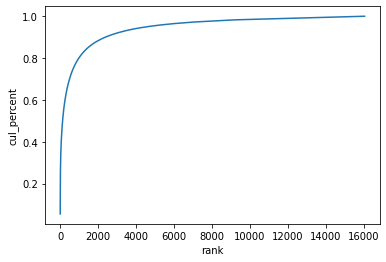

In [146]:
import seaborn as sns

sns.lineplot(x='rank', y='cul_percent', data=wc);

### 4) 확장된 불용어 사전을 사용해 토큰을 정제합니다.


- **문항 4) 기본 불용어 사전에 두 단어(`"data", "work"`)를 추가하는 코드를 사용해주세요.**
- **문항 5) 불용어를 제거하고 난 뒤 토큰 순위 10개의 단어를 입력하세요.**

In [147]:
STOP_WORDS = nlp.Defaults.stop_words.union(['data', 'work'])

In [148]:
tokens = []

for doc in tokenizer.pipe(df['title']):
    doc_tokens = []

    for token in doc:
        # 해당 토큰이 불용어와 구두점이 아니면 저장
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(re.sub(r"[^a-z0-9]", "", token.text.lower()))

    tokens.append(doc_tokens)

df['title_tokens'] = tokens

In [149]:
df

,title,company,description,title_tokens,company_tokens,description_tokens,token
1,Data Scientist (Structured Products),EquiTrust Life Insurance Company,Job Details Description Essential Duties and R...,"[scientist, structured, products]","[equitrust, life, insurance, company]","[job, details, description, essential, duties,...","[data, scientist, structured, products, equitr..."
3,"Specialist, Data Science",Nationwide,As a team member in the Finance and Internal A...,"[specialist, science]",[nationwide],"[as, a, team, member, in, the, finance, and, i...","[specialist, data, science, nationwide, as, a,..."
4,Sr. Data Scientist (Remote),American Credit Acceptance,Overview: American Credit Acceptance seeks a h...,"[sr, scientist, remote]","[american, credit, acceptance]","[overview, american, credit, acceptance, seeks...","[sr, data, scientist, remote, american, credit..."
5,Data Scientist Associate Sr (DADS06) BTB - LEG...,"JPMorgan Chase Bank, N.A.",J.P. Morgan's Corporate Investment Bank (CIB) ...,"[scientist, associate, sr, dads06, btb, , lega...","[jpmorgan, chase, bank, na]","[jp, morgans, corporate, investment, bank, cib...","[data, scientist, associate, sr, dads06, btb, ..."
6,Data Scientist,VyStar Credit Union,"At VyStar, we offer competitive pay, an excell...",[scientist],"[vystar, credit, union]","[at, vystar, we, offer, competitive, pay, an, ...","[data, scientist, vystar, credit, union, at, v..."
...,...,...,...,...,...,...,...
1295,Senior Data Applied Scientist,Microsoft,Senior Data Applied Scientist Do you have a pa...,"[senior, applied, scientist]",[microsoft],"[senior, data, applied, scientist, do, you, ha...","[senior, data, applied, scientist, microsoft, ..."
1296,Senior Data Scientist,Takeda Pharmaceuticals,Job Description OBJECTIVES: Effectively workin...,"[senior, scientist]","[takeda, pharmaceuticals]","[job, description, objectives, effectively, wo...","[senior, data, scientist, takeda, pharmaceutic..."
1297,Senior Data Scientist,eBay Inc.,eBay is a global commerce leader that allows y...,"[senior, scientist]","[ebay, inc]","[ebay, is, a, global, commerce, leader, that, ...","[senior, data, scientist, ebay, inc, ebay, is,..."
1298,Senior Data Scientist,Cox Automotive,"Cox Automotive, a subsidiary of Cox Enterprise...","[senior, scientist]","[cox, automotive]","[cox, automotive, a, subsidiary, of, cox, ente...","[senior, data, scientist, cox, automotive, cox..."


In [150]:
tokens = []

for doc in tokenizer.pipe(df['company']):
    doc_tokens = []

    for token in doc:
        # 해당 토큰이 불용어와 구두점이 아니면 저장
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(re.sub(r"[^a-z0-9]", "", token.text.lower()))

    tokens.append(doc_tokens)

df['company_tokens'] = tokens

In [151]:
tokens = []

for doc in tokenizer.pipe(df['description']):
    doc_tokens = []

    for token in doc:
        # 해당 토큰이 불용어와 구두점이 아니면 저장
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(re.sub(r"[^a-z0-9]", "", token.text.lower()))

    tokens.append(doc_tokens)

df['description_tokens'] = tokens

In [152]:
df['token']  = df['title_tokens'] + df['company_tokens'] + df['description_tokens']

In [153]:
word_counts = Counter()
df['token'].apply(lambda x: word_counts.update(x))
word_counts.most_common(11)

[('', 6035),
 ('experience', 3452),
 ('business', 2072),
 ('science', 1685),
 ('team', 1629),
 ('learning', 1628),
 ('scientist', 1447),
 ('analysis', 1352),
 ('skills', 1251),
 ('analytics', 1189),
 ('machine', 1174)]

In [154]:
wc = word_count(df['token'])
wc.head()

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
0,,706,6035,1,0.023911,0.023911,0.932629
196,experience,705,3452,2,0.013677,0.037589,0.931308
372,business,536,2072,3,0.008209,0.045798,0.708058
161,science,615,1685,4,0.006676,0.052474,0.812417
121,team,588,1629,5,0.006454,0.058928,0.776750


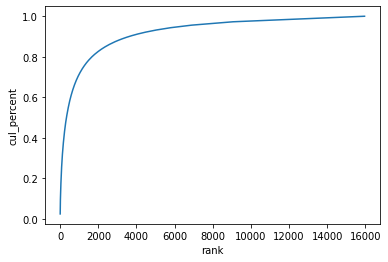

In [155]:
import seaborn as sns

sns.lineplot(x='rank', y='cul_percent', data=wc);

In [156]:
!pip install squarify

In [157]:
import squarify

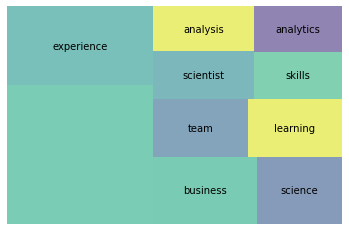

In [158]:
wc_top20 = wc[wc['rank'] <= 10]
squarify.plot(sizes=wc_top20['percent'], label=wc_top20['word'], alpha=0.6)
plt.axis('off')
plt.show()

### 5) Lemmatization 사용 효과를 분석해 봅니다.



- **문항 6) Lemmatization을 진행한 뒤 상위 10개 단어를 입력하세요.**

In [159]:
def get_lemmas(text):
    """
    표제어 추출
    """
    lemmas = []
    
    doc = nlp(text.lower())

    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(re.sub(r"[^a-z0-9]", "", token.lemma_))
    
    return lemmas

In [160]:
df['title_tokens'] = df['title'].apply(get_lemmas)
df['title_tokens'].head()

1              [datum, scientist, structured, product]
3                         [specialist, datum, science]
4                        [sr, data, scientist, remote]
5    [data, scientist, associate, sr, dads06, btb, ...
6                                    [data, scientist]
Name: title_tokens, dtype: object

In [161]:
df['company_tokens'] = df['company'].apply(get_lemmas)
df['company_tokens'].head()

1    [equitrust, life, insurance, company]
3                             [nationwide]
4           [american, credit, acceptance]
5              [jpmorgan, chase, bank, na]
6                  [vystar, credit, union]
Name: company_tokens, dtype: object

In [162]:
df['description_tokens'] = df['description'].apply(get_lemmas)
df['description_tokens'].head()

1    [job, detail, description, essential, duty, re...
3    [team, member, finance, internal, audit, depar...
4    [overview, american, credit, acceptance, seek,...
5    [jp, morgan, corporate, investment, bank, cib,...
6    [vystar, offer, competitive, pay, excellent, b...
Name: description_tokens, dtype: object

In [163]:
word_counts = Counter()
df['description_tokens'].apply(lambda x: word_counts.update(x))
word_counts.most_common(11)

[('datum', 5507),
 ('', 5288),
 ('experience', 3672),
 ('work', 2913),
 ('team', 2336),
 ('data', 2235),
 ('business', 2195),
 ('science', 1738),
 ('analysis', 1609),
 ('model', 1472),
 ('analytic', 1433)]

## 2. 유사한 문서 찾기

### 1) `TfidfVectorizer`를 이용해 각 문서들을 벡터화 한 후 KNN 모델을 만들고, <br/> 내가 원하는 `job description`을 질의해 가장 가까운 검색 결과들을 가져오고 분석합니다.

- **문항 9) 88번 index의 `job description`와 5개의 가장 유사한 `job description`이 있는 index를 입력하세요.**
    - 답은 88번 인덱스를 포함합니다.
    - `max_features = 3000` 으로 설정합니다.
    - [88, 90, 91, 93, 94] 형태로 답을 입력해주세요

In [190]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [191]:
tfidf_vect = TfidfVectorizer(stop_words='english', max_features=3000)

dtm_tfidf_des = tfidf_vect.fit_transform(df['description'])

dtm_tfidf_des = pd.DataFrame(dtm_tfidf_des.todense(), columns=tfidf_vect.get_feature_names())
dtm_tfidf_des

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,10,100,11,12,14,15,18,19,20,200,2017,2018,2019,2020,22,24,25,30,300,31,35,3m,40,400,401,401k,50,500,5000,60,600,75,80,90,aa,ab,abilities,ability,...,wellness,whip,wholly,wi,wide,widely,wildlife,willing,willingness,winning,women,word,work,workday,worked,worker,workers,workflow,workflows,workforce,working,workplace,workplaces,works,world,worldwide,wrangling,wri,write,writing,written,www,year,years,yelp,yes,york,yrs,zillow,zulily
0,0.0,0.000000,0.05272,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058637,0.052353,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.069356,0.0,0.0,0.000000,0.062315,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.051677,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.023379,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.072438,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.031375,0.027418,0.0,0.0,0.000000,0.098541,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.071503,0.0,0.0,0.000000,0.012252,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.018485,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.056214,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.058743,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.062152,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.058510,0.000000,0.000000,0.017488,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.033337,0.00000,0.035082,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.042929,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.043708,...,0.000000,0.0,0.0,0.0,0.053924,0.000000,0.0,0.000000,0.038602,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.038116,0.000000,0.0,0.0,0.030795,0.103499,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.060084,0.013012,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.027691,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.030387,0.0,0.0,0.0,0.0,0.000000,0.0,0.030644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023711,0.010585,...,0.000000,0.0,0.0,0.0,0.019588,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.028417,0.067195,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.020896,0.0,0.0,0.044746,0.000000,0.0,0.0,0.0,0.0,0.021826,0.000000,0.000000,0.000000,0.047268,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.051710,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.019766,...,0.056744,0.0,0.0,0.0,0.036578,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.078423,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.039021,0.0,0.0,0.041778,0.070206,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.017653,0.0,0.000000,0.0,0.0,0.0,0.0
753,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.05432,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.095385,...,0.000000,0.0,0.0,0.0,0.035304,0.000000,0.0,0.000000,0.050545,0.0,0.0,0.000000,0.075691,0.0,0.000000,0.141457,0.0,0.0,0.0,0.000000,0.056492,0.0,0.0,0.000000,0.000000,0

In [192]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm_tfidf_des)

NearestNeighbors(algorithm='kd_tree')

In [193]:
nn.kneighbors([dtm_tfidf_des.iloc[2]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  "X does not have valid feature names, but"


(array([[0.        , 0.74327013, 1.18972951, 1.19363484, 1.19439503]]),
 array([[  2,  38, 328,  29,  12]]))

## 3. TF-IDF 이용한 텍스트 분류 진행하기

TF-IDF를 이용해 문장 혹은 문서를 벡터화한 경우, 이 벡터값을 이용해 문서 분류 태스크를 진행할 수 있습니다. 

현재 다루고 있는 데이터셋에는 label이 존재하지 않으므로, title 컬럼에 "Senior"가 있는지 없는지 여부를 통해 Senior 직무 여부를 분류하는 작업을 진행해보겠습니다.

### 1) title 컬럼에 "Senior" 문자열이 있으면 1, 없으면 0인 "Senior"라는 새로운 컬럼을 생성해주세요.

문항 7) 새롭게 만든 Senior 컬럼에서 값이 1인 (Senior O) 데이터의 개수는?

In [194]:
df

,title,company,description,title_tokens,company_tokens,description_tokens,token,senior
1,Data Scientist (Structured Products),EquiTrust Life Insurance Company,Job Details Description Essential Duties and R...,"[datum, scientist, structured, product]","[equitrust, life, insurance, company]","[job, detail, description, essential, duty, re...","[scientist, structured, products, equitrust, l...",0
3,"Specialist, Data Science",Nationwide,As a team member in the Finance and Internal A...,"[specialist, datum, science]",[nationwide],"[team, member, finance, internal, audit, depar...","[specialist, science, nationwide, team, member...",0
4,Sr. Data Scientist (Remote),American Credit Acceptance,Overview: American Credit Acceptance seeks a h...,"[sr, data, scientist, remote]","[american, credit, acceptance]","[overview, american, credit, acceptance, seek,...","[sr, scientist, remote, american, credit, acce...",0
5,Data Scientist Associate Sr (DADS06) BTB - LEG...,"JPMorgan Chase Bank, N.A.",J.P. Morgan's Corporate Investment Bank (CIB) ...,"[data, scientist, associate, sr, dads06, btb, ...","[jpmorgan, chase, bank, na]","[jp, morgan, corporate, investment, bank, cib,...","[scientist, associate, sr, dads06, btb, , lega...",0
6,Data Scientist,VyStar Credit Union,"At VyStar, we offer competitive pay, an excell...","[data, scientist]","[vystar, credit, union]","[vystar, offer, competitive, pay, excellent, b...","[scientist, vystar, credit, union, vystar, off...",0
...,...,...,...,...,...,...,...,...
1295,Senior Data Applied Scientist,Microsoft,Senior Data Applied Scientist Do you have a pa...,"[senior, datum, apply, scientist]",[microsoft],"[senior, datum, apply, scientist, passion, dat...","[senior, applied, scientist, microsoft, senior...",1
1296,Senior Data Scientist,Takeda Pharmaceuticals,Job Description OBJECTIVES: Effectively workin...,"[senior, datum, scientist]","[takeda, pharmaceutical]","[job, description, objective, effectively, wor...","[senior, scientist, takeda, pharmaceuticals, j...",1
1297,Senior Data Scientist,eBay Inc.,eBay is a global commerce leader that allows y...,"[senior, datum, scientist]","[ebay, inc]","[ebay, global, commerce, leader, allow, shape,...","[senior, scientist, ebay, inc, ebay, global, c...",1
1298,Senior Data Scientist,Cox Automotive,"Cox Automotive, a subsidiary of Cox Enterprise...","[senior, datum, scientist]","[cox, automotive]","[cox, automotive, subsidiary, cox, enterprise,...","[senior, scientist, cox, automotive, cox, auto...",1


In [195]:
df['senior'] = df['title'].apply(lambda x : 1 if 'Senior' in x else 0)

In [196]:
df['senior'].value_counts()

0    662
1     95
Name: senior, dtype: int64

문항 8) sklearn의 `train_test_split`을 통해 train 데이터와 valid 데이터로 나눈 후, `sklearn`의 `DecisionTreeClassifier`를 이용해 분류를 진행해주세요. 

단, x값은 위에서 학습한 dtm_tfidf를 그대로 이용해주세요. train_test_split과 DecisionTreeClassifier의 random_state을 42로 고정하고, test_size는 0.1로 설정해주세요.

학습을 완료한 후, test 데이터에 대한 예측을 진행하고 label 1에 대한 precision과 recall 값을 적어주세요

In [197]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dtm_tfidf_des, df['senior'], test_size = 0.1, random_state=42, stratify = df['senior'])

In [201]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [203]:
y_pred = model.predict(X_test)

In [204]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        66
           1       0.29      0.20      0.24        10

    accuracy                           0.83        76
   macro avg       0.58      0.56      0.57        76
weighted avg       0.81      0.83      0.82        76

